# Soluciónes

###  Solución 1

In [6]:
# Cambio en la funcion inicial

n_cambio <- function(x, y.vec = c(), l = list()) {
  if (x == 0) {
    return(c(l, list(y.vec)))
  } else {
    monedas <- c(200, 100, 50, 20, 10, 5)
    new.x <- x -monedas
    new.x <- new.x[new.x >= 0]
    for (z in new.x) {
      y.tmp <- c(y.vec, x - z)
      if (identical(y.tmp, sort(y.tmp))) {
        l <- n_cambio(z, y.tmp, l)
      }
    }
  }
  return(l)
}

### Solución 2

Primero, asumamos que los reflectores están con índices desde el 0 hasta el $N-1$, lo que implica que nuestro reflector inicial es el $0$. Luego, el $i$-ésimo reflector que chocará el haz será el,

$$ f(i) = (0+i*X)\,mod\,N $$

Es muy conocido que para que esta función tenga de rango todos los valores del $0$ al $N-1$, se debe dar que el $gcd(X,N)=1$, así que necesitaríamos calcular primero el conjunto:

$$ A = \{x\in\mathbb{N}/gcd(x,N)=1\} $$

Este valor está dado por la función $\phi$ de Euler, así que por probabilidad simple definimos que:

$$ P(gana\,N) = \frac{\phi(N)}{N} $$

In [1]:
N <- 3;
i <- 2;
phi <- N;
while(i*i<=N){
    if(N %% i== 0){
        while(N %% i == 0){
            N <- N/i
        }
        phi <- phi - phi/i
    }
    i <- i+1
}
if(N!=1){phi <- phi - phi/N}
respuesta = phi/N
cat(sprintf(c("Probabilidad = %.11f"), c(respuesta)), sep=" ")

Probabilidad = 0.66666666667

### Solución 3

Este problema sencillo se reduce a notar que si a un jugador le toca sacar una cantidad de una pila de tamaño 4 , entonces perderá definitivamente, pues solo puede dar a lugar una pila de tamaño 1, 2 o 3, dejando al oponente ganar. Además, si se usa la estrategia de 4-(Jugada anterior del rival), se puede ir reduciendo de 4 en 4 de forma regular y segura hasta que se llegue a 4 (esta estrategia será aprovechada por el jugador que tenga que sacar una cantidad de una pila de tamaño $n$ con $n\neq 4k$, $k\in\mathbb{N}$), por lo que si $n$ es un múltiplo de 4 y a Vilma le tocara jugar luego de Jessica, entonces Jessica automáticamente fijaría su derrota.

Además, como $4k$ con $k\in\mathbb{N}$ es un valor en el cual (si tu rival juega de manera óptima usando la estrategia para reducir de 4 en 4) se asegura la derrota, Vilma no elegirá múltiplos de 4, por lo que ya tiene 3 rondas aseguradas. Luego, si Jessica elige un múltiplo de 4 tendría más bien su derrota asegurada.

Ahora, la probabilidad de que Jessica elija un múltiplo de 4 se reduce a agrupar los números por su respectivo módulo sobre 4, en cuyo caso solo existen 4 opciones (0,1,2,3). Entonces, si Jessica llegara a elegir al menos 1 vez un múltiplo de 4, perdería al final, entonces:

$$ P(n\,mod\,4 = 0) =  \frac{1}{4} $$

Como cada juego es independiente de los demás, entonces necesitaríamos calcular, P(Jessica pierda al menos un juego extra) = 1 - P(Jessica no pierda ningun juego), 

$$
1 - P(n\,mod\,4 \neq 0)P(n\,mod\,4 \neq 0)P(n\,mod\,4 \neq 0) = 1 - \frac{27}{64} = \frac{37}{64}.
$$


### Solución 4

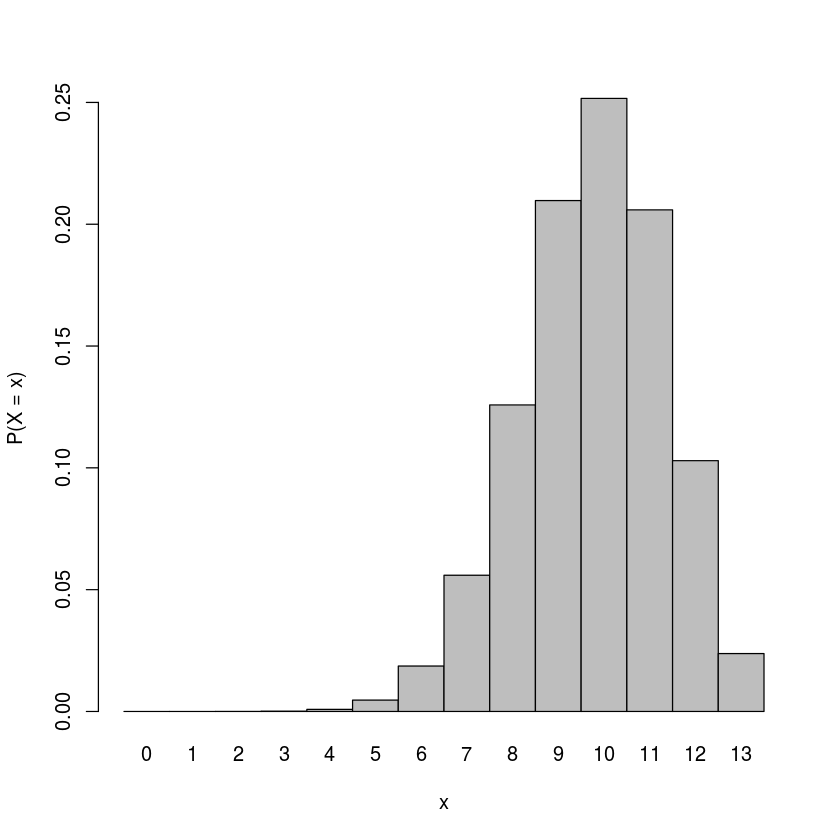

In [15]:
barplot(dbinom(x=0:13,size=13,prob=0.75),names.arg=0:13,space=0,xlab="x",ylab="P(X = x)")


In [8]:
dbinom(13,13,0.75)

[1] 0.02375726

In [9]:
1-pbinom(q=9,13,0.75)

[1] 0.5842527

In [10]:
sum(dbinom(8:11,13,0.75))
pbinom(11,13,0.75)-pbinom(7,13,0.75)

[1] 0.793082

[1] 0.793082

In [11]:
visitas <- rbinom(10,13,0.75)
visitas

[1] 11 10 10 10  9 10 11 10 10  9

In [12]:
mu.X <- 13*0.75
mu.X
sigma.X <- sqrt(mu.X*0.25)
sigma.X

[1] 9.75

[1] 1.561249

### Solución 5

In [13]:
1-ppois(100,107)

[1] 0.7319128

In [14]:
dpois(0,107)

[1] 3.39227e-47

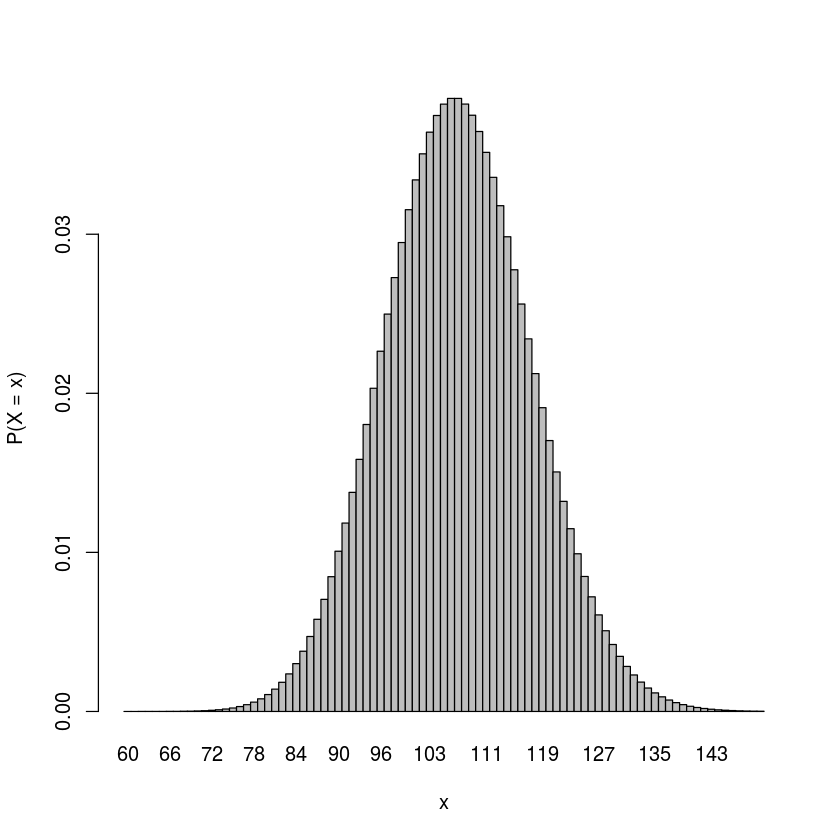

In [16]:
barplot(dpois(x=60:150,lambda=107),names.arg=60:150,space=0,xlab="x",ylab="P(X = x)")

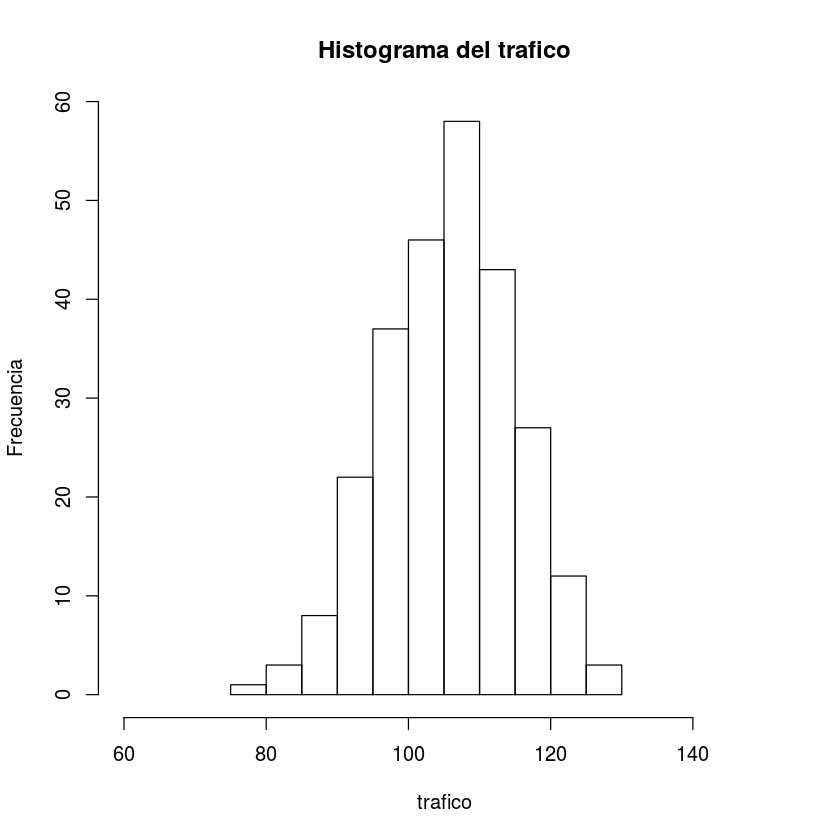

In [20]:
trafico <- rpois(n=260,107)
hist(trafico, main = "Histograma del trafico", xlim=c(60,150), ylab = "Frecuencia")

### Solución 6

In [21]:
mu <- 17
sigma <- 4.5

1-pnorm(20,mu,sigma)

[1] 0.2524925

In [22]:
pnorm(10,mu,sigma)-pnorm(5,mu,sigma)

[1] 0.05607653

[1] 22.76698

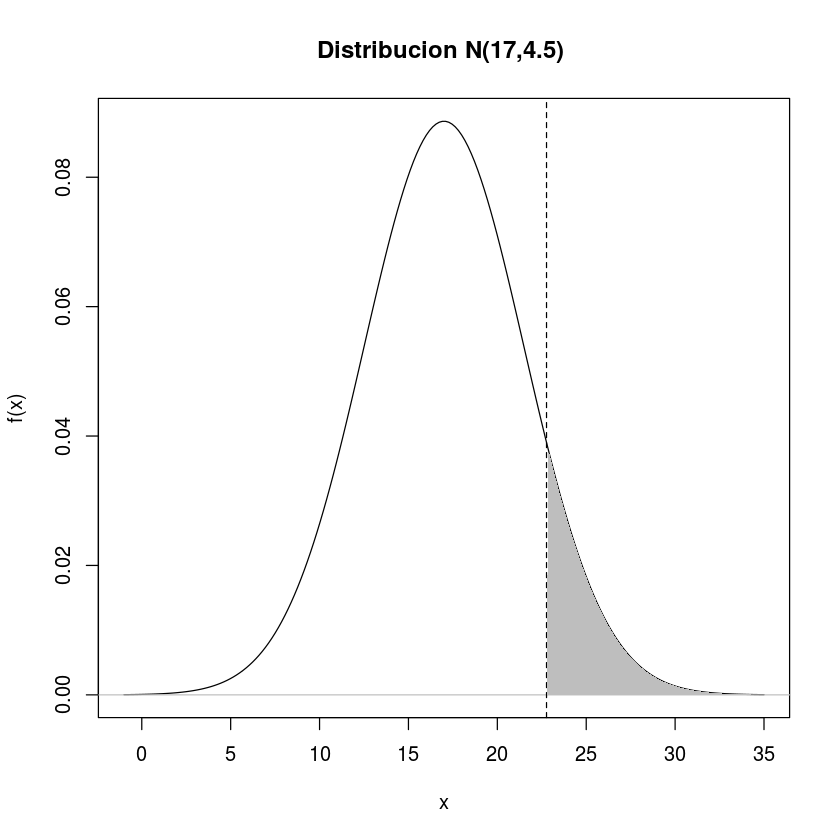

In [26]:
# Calculamos el tiempo que marca el 10 por ciento más lento de los estudiantes.

lento10 <- qnorm(1-0.1,mu,sigma)
lento10

xvals <- seq(mu-4*sigma,mu+4*sigma,length=200)
fx <- dnorm(xvals,mu,sigma)
xvals.sub <- xvals[xvals>=lento10]
fx.sub <- fx[xvals>=lento10]
plot(xvals,fx,type="l",main="Distribucion N(17,4.5) ",xlab="x",ylab="f(x)")
abline(h=0,col="gray")
abline(v=lento10,lty=2)
polygon(rbind(c(lento10,0),cbind(xvals.sub,fx.sub),c(max(xvals),0)),border=NA,col="gray")

### Solución 7

In [28]:
lapply(mtcars, function(x) sd(x, na.rm =T)/ mean(x, na.rm = T))

$mpg
[1] 0.2999881

$cyl
[1] 0.2886338

$disp
[1] 0.5371779

$hp
[1] 0.4674077

$drat
[1] 0.1486638

$wt
[1] 0.3041285

$qsec
[1] 0.1001159

$vs
[1] 1.152037

$am
[1] 1.228285

$gear
[1] 0.2000825

$carb
[1] 0.5742933

In [31]:
# Esta funcion es clausura, devuelve una funcion. 
# Se le conoce como la transformacion Box-Cox de un parametro

bc <- function(lambda) {
  if (lambda == 0) {
    function(x) log(x)
  } else {
    function(x) (x ^ lambda - 1) / lambda
  }
}

In [32]:
trims <- c(0, 0.1, 0.2, 0.5)
x <- rcauchy(100)

lapply(trims, function(trim) mean(x, trim = trim))
lapply(trims, mean, x = x)

[[1]]
[1] -1.688296

[[2]]
[1] -0.3453119

[[3]]
[1] -0.2496408

[[4]]
[1] -0.1140033

[[1]]
[1] -1.688296

[[2]]
[1] -0.3453119

[[3]]
[1] -0.2496408

[[4]]
[1] -0.1140033

Respuesta al resultado anterior: 

El segundo paramétro de `lapply` puede tomar el nombre de una función con `match.fun`. Así `lapply(trims, 'mean', x = x)` también trabaja.

`lapply` automáticamente aplicará la función desde el segundo parámetro al primer parámetro. Aunque, por defecto, asumirá que el primer argumento a `lapply` será el primer argumento a la función a menos que especifique lo contrario en el tercer argumento de `lapply`.

Aquí, `mean` toma tres argumentos: `x`, `trim`, y `na.rm`. `lapply (trims, mean)` realiza  `mean (trims)` o `mean (x = trim)`. Pero especificando que `x = x`, `lapply` entonces sabe que el valor de `x` para `mean` será la variable `x`  y luego pasa a `trims` como segundo argumento a` mean`.

In [33]:
# La función a continuación escala un vector que pertenece en el rango [0, 1]

scale01 <- function(x) {
  rng <- range(x, na.rm = TRUE)
  (x - rng[1]) / (rng[2] - rng[1])
}


In [34]:
lapply(mtcars, scale01)

$mpg
 [1] 0.4510638 0.4510638 0.5276596 0.4680851 0.3531915 0.3276596 0.1659574
 [8] 0.5957447 0.5276596 0.3744681 0.3148936 0.2553191 0.2936170 0.2042553
[15] 0.0000000 0.0000000 0.1829787 0.9361702 0.8510638 1.0000000 0.4723404
[22] 0.2170213 0.2042553 0.1234043 0.3744681 0.7191489 0.6638298 0.8510638
[29] 0.2297872 0.3957447 0.1957447 0.4680851

$cyl
 [1] 0.5 0.5 0.0 0.5 1.0 0.5 1.0 0.0 0.0 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0
[20] 0.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.5 1.0 0.0

$disp
 [1] 0.22175106 0.22175106 0.09204290 0.46620105 0.72062859 0.38388626
 [7] 0.72062859 0.18857570 0.17385882 0.24070841 0.24070841 0.51060115
[13] 0.51060115 0.51060115 1.00000000 0.97006735 0.92017960 0.01895735
[19] 0.01147418 0.00000000 0.12222499 0.61586431 0.58094288 0.69568471
[25] 0.82040409 0.01970566 0.12272387 0.05986530 0.69817910 0.18433525
[31] 0.57345972 0.12446994

$hp
 [1] 0.20494700 0.20494700 0.14487633 0.20494700 0.43462898 0.18727915
 [7] 0.68197880 0.03533569 0.15194346 0.25088339 0.25088339 0.45229682
[13] 0.45229682 0.45229682 0.54063604 0.57597173 0.62897527 0.04946996
[19] 0.00000000 0.04593640 0.15901060 0.34628975 0.34628975 0.68197880
[25] 0.43462898 0.04946996 0.13780919 0.21554770 0.74911661 0.43462898
[31] 1.00000000 0.20141343

$drat
 [1] 0.52534562 0.52534562 0.50230415 0.14746544 0.17972350 0.00000000
 [7] 0.20737327 0.42857143 0.53456221 0.53456221 0.53456221 0.14285714
[13] 0.14285714 0.14285714 0.07834101 0.11059908 0.21658986 0.60829493
[19] 1.00000000 0.67281106 0.43317972 0.00000000 0.17972350 0.44700461
[25] 0.14746544 0.60829493 0.76958525 0.46543779 0.67281106 0.39631336
[31] 0.35944700 0.62211982

$wt
 [1] 0.28304781 0.34824853 0.20634109 0.43518282 0.49271286 0.49782664
 [7] 0.52595244 0.42879059 0.41856303 0.49271286 0.49271286 0.65379698
[13] 0.56686269 0.57964715 0.95551010 1.00000000 0.97980056 0.17565840
[19] 0.02608029 0.08233188 0.24341601 0.51316799 0.49143442 0.59498849
[25] 0.59626694 0.10790079 0.16031705 0.00000000 0.42367681 0.32140118
[31] 0.52595244 0.32395807

$qsec
 [1] 0.23333333 0.30000000 0.48928571 0.58809524 0.30000000 0.68095238
 [7] 0.15952381 0.65476190 1.00000000 0.45238095 0.52380952 0.34523810
[13] 0.36904762 0.41666667 0.41428571 0.39523810 0.34761905 0.59166667
[19] 0.47857143 0.64285714 0.65595238 0.28214286 0.33333333 0.10833333
[25] 0.30357143 0.52380952 0.26190476 0.28571429 0.00000000 0.11904762
[31] 0.01190476 0.48809524

$vs
 [1] 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1

$am
 [1] 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1

$gear
 [1] 0.5 0.5 0.5 0.0 0.0 0.0 0.0 0.5 0.5 0.5 0.5 0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.5
[20] 0.5 0.0 0.0 0.0 0.0 0.0 0.5 1.0 1.0 1.0 1.0 1.0 0.5

$carb
 [1] 0.4285714 0.4285714 0.0000000 0.0000000 0.1428571 0.0000000 0.4285714
 [8] 0.1428571 0.1428571 0.4285714 0.4285714 0.2857143 0.2857143 0.2857143
[15] 0.4285714 0.4285714 0.4285714 0.0000000 0.1428571 0.0000000 0.0000000
[22] 0.1428571 0.1428571 0.4285714 0.1428571 0.0000000 0.1428571 0.1428571
[29] 0.4285714 0.7142857 1.0000000 0.1428571

In [35]:
# Para un conjunto de datos como iris, obtendremos un error  debido a data frames no numéricos.

iris[sapply(iris, is.numeric)] # Seleccionamos columnas numericas

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2
4.9,3.1,1.5,0.1


In [37]:
lapply(iris[sapply(iris, is.numeric)], scale01) # Aplicamos una funcion a columnas numericas.

$Sepal.Length
  [1] 0.22222222 0.16666667 0.11111111 0.08333333 0.19444444 0.30555556
  [7] 0.08333333 0.19444444 0.02777778 0.16666667 0.30555556 0.13888889
 [13] 0.13888889 0.00000000 0.41666667 0.38888889 0.30555556 0.22222222
 [19] 0.38888889 0.22222222 0.30555556 0.22222222 0.08333333 0.22222222
 [25] 0.13888889 0.19444444 0.19444444 0.25000000 0.25000000 0.11111111
 [31] 0.13888889 0.30555556 0.25000000 0.33333333 0.16666667 0.19444444
 [37] 0.33333333 0.16666667 0.02777778 0.22222222 0.19444444 0.05555556
 [43] 0.02777778 0.19444444 0.22222222 0.13888889 0.22222222 0.08333333
 [49] 0.27777778 0.19444444 0.75000000 0.58333333 0.72222222 0.33333333
 [55] 0.61111111 0.38888889 0.55555556 0.16666667 0.63888889 0.25000000
 [61] 0.19444444 0.44444444 0.47222222 0.50000000 0.36111111 0.66666667
 [67] 0.36111111 0.41666667 0.52777778 0.36111111 0.44444444 0.50000000
 [73] 0.55555556 0.50000000 0.58333333 0.63888889 0.69444444 0.66666667
 [79] 0.47222222 0.38888889 0.33333333 0.33333333 0.41666667 0.47222222
 [85] 0.30555556 0.47222222 0.66666667 0.55555556 0.36111111 0.33333333
 [91] 0.33333333 0.50000000 0.41666667 0.19444444 0.36111111 0.38888889
 [97] 0.38888889 0.52777778 0.22222222 0.38888889 0.55555556 0.41666667
[103] 0.77777778 0.55555556 0.61111111 0.91666667 0.16666667 0.83333333
[109] 0.66666667 0.80555556 0.61111111 0.58333333 0.69444444 0.38888889
[115] 0.41666667 0.58333333 0.61111111 0.94444444 0.94444444 0.47222222
[121] 0.72222222 0.36111111 0.94444444 0.55555556 0.66666667 0.80555556
[127] 0.52777778 0.50000000 0.58333333 0.80555556 0.86111111 1.00000000
[133] 0.58333333 0.55555556 0.50000000 0.94444444 0.55555556 0.58333333
[139] 0.47222222 0.72222222 0.66666667 0.72222222 0.41666667 0.69444444
[145] 0.66666667 0.66666667 0.55555556 0.61111111 0.52777778 0.44444444

$Sepal.Width
  [1] 0.62500000 0.41666667 0.50000000 0.45833333 0.66666667 0.79166667
  [7] 0.58333333 0.58333333 0.37500000 0.45833333 0.70833333 0.58333333
 [13] 0.41666667 0.41666667 0.83333333 1.00000000 0.79166667 0.62500000
 [19] 0.75000000 0.75000000 0.58333333 0.70833333 0.66666667 0.54166667
 [25] 0.58333333 0.41666667 0.58333333 0.62500000 0.58333333 0.50000000
 [31] 0.45833333 0.58333333 0.87500000 0.91666667 0.45833333 0.50000000
 [37] 0.62500000 0.66666667 0.41666667 0.58333333 0.62500000 0.12500000
 [43] 0.50000000 0.62500000 0.75000000 0.41666667 0.75000000 0.50000000
 [49] 0.70833333 0.54166667 0.50000000 0.50000000 0.45833333 0.12500000
 [55] 0.33333333 0.33333333 0.54166667 0.16666667 0.37500000 0.29166667
 [61] 0.00000000 0.41666667 0.08333333 0.37500000 0.37500000 0.45833333
 [67] 0.41666667 0.29166667 0.08333333 0.20833333 0.50000000 0.33333333
 [73] 0.20833333 0.33333333 0.37500000 0.41666667 0.33333333 0.41666667
 [79] 0.37500000 0.25000000 0.16666667 0.16666667 0.29166667 0.29166667
 [85] 0.41666667 0.58333333 0.45833333 0.12500000 0.41666667 0.20833333
 [91] 0.25000000 0.41666667 0.25000000 0.12500000 0.29166667 0.41666667
 [97] 0.37500000 0.37500000 0.20833333 0.33333333 0.54166667 0.29166667
[103] 0.41666667 0.37500000 0.41666667 0.41666667 0.20833333 0.37500000
[109] 0.20833333 0.66666667 0.50000000 0.29166667 0.41666667 0.20833333
[115] 0.33333333 0.50000000 0.41666667 0.75000000 0.25000000 0.08333333
[121] 0.50000000 0.33333333 0.33333333 0.29166667 0.54166667 0.50000000
[127] 0.33333333 0.41666667 0.33333333 0.41666667 0.33333333 0.75000000
[133] 0.33333333 0.33333333 0.25000000 0.41666667 0.58333333 0.45833333
[139] 0.41666667 0.45833333 0.45833333 0.45833333 0.29166667 0.50000000
[145] 0.54166667 0.41666667 0.20833333 0.41666667 0.58333333 0.41666667

$Petal.Length
  [1] 0.06779661 0.06779661 0.05084746 0.08474576 0.06779661 0.11864407
  [7] 0.06779661 0.08474576 0.06779661 0.08474576 0.08474576 0.10169492
 [13] 0.06779661 0.01694915 0.03389831 0.08474576 0.05084746 0.06779661
 [19] 0.11864407 0.08474576 0.11864407 0.08474576 0.00000000 0.11864407
 [25] 0.15254237 0.10169492 0.10169492 0.08474576 0.06779661 0.101694

### Solución 8

In [57]:
# La función devuelve el desplazamiento del camino desde su punto de partida.

camino = function(N) {
    cam1 = rep(0,N+1) # Inicializamos el vector de pasos 
    for (i in 2:(N+1)) {
        x = runif(1) 
        if (x <= 0.5) cam1[i]=cam1[i-1]-1 else cam1[i]=cam1[i-1]+1
            }
    return(cam1[N]) # Punto final
 }

[1] 0.94

[1] 10.81508

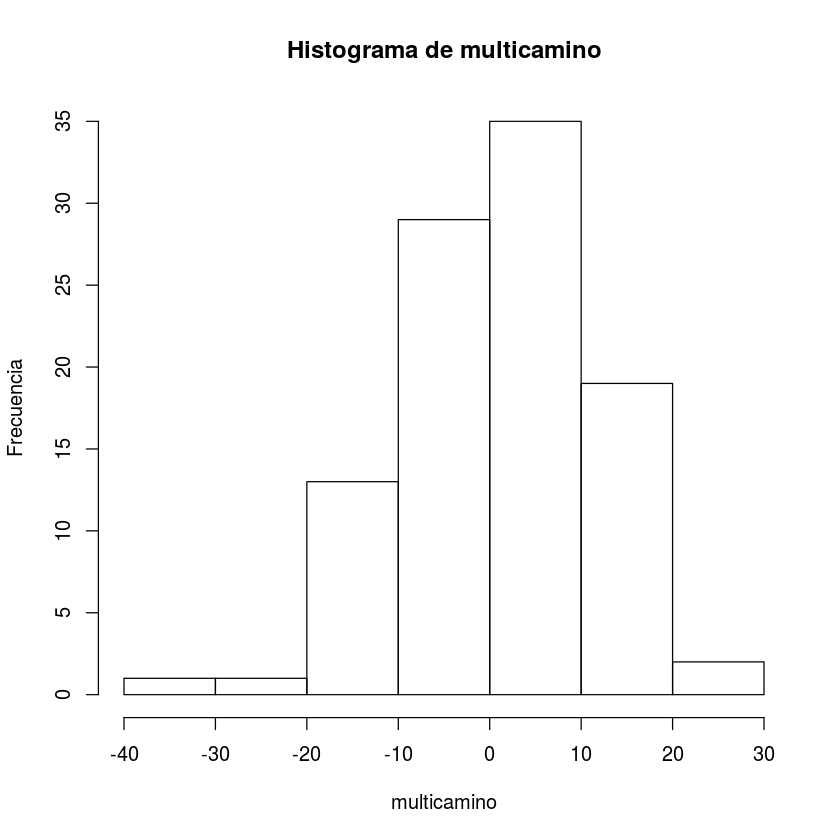

In [61]:
# Para el problema

multicamino = c()
for (k in 1:100) { # 100 caminos
    multicamino[k] = camino(100) # punto final del k-esimo camino
}

mean(multicamino) 
sd(multicamino)   
hist(multicamino, main = "Histograma de multicamino", ylab = "Frecuencia")

### Solución 9 


In [4]:
# La función maxf1 simula X

maxf1 <- function(n.lanzamientos) {
    # retorna la longitud  de la mayor secuencia de caras  
    # en una secuencia de n.lanzamientos
    n_caras = 0 # longitud de la secuencia actual
    max_caras = 0 # longitud de la secuencia mayor de caras 
    for (i in 1:n.lanzamientos) {
        if (runif(1) < 0.5) { 
            n_caras <- n_caras + 1
        } else { # si sale sello, la secuencia de caras regresa a 0 
            n_caras <- 0
        };
        # vemos si la actual secuencia de caras es la mayor 
        if (n_caras > max_caras) {
            max_caras <- n_caras
        }
    }
    return(max_caras)
}
maxf1(20)

[1] 3

### Solución 10

 El código siguiente tiene que ver con la demostración de la [ley de los grandes números](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros), para ello sean las muestras $X_i,\ i =1, \dots, n$ independientes e idénticamente distribuidas de una distribución uniforme $\{1, \dots, 6 \}$ y mostrando $X_n$ junto con el promedio $Y_n = \sum_{i =1}^{n}X_n/n$ para distintos valores de $n$,

In [78]:
# Realizamos 1o muestras de Uniforme({1,...,6})

S = sample(1:6, 10, replace = TRUE)
S

[1] 3 3 2 6 3 4 1 6 3 3

In [79]:
# Calculamos el promedio de 1..10 muestras

cumsum(S)/1:10

[1] 3.000000 3.000000 2.666667 3.500000 3.400000 3.500000 3.142857 3.500000
 [9] 3.444444 3.400000

Esto muestra que cuando $n$ crece, el promedio se acerca a la esperanza $3.5$. El siguiente código muestra que sucede cuando $n \rightarrow \infty$.

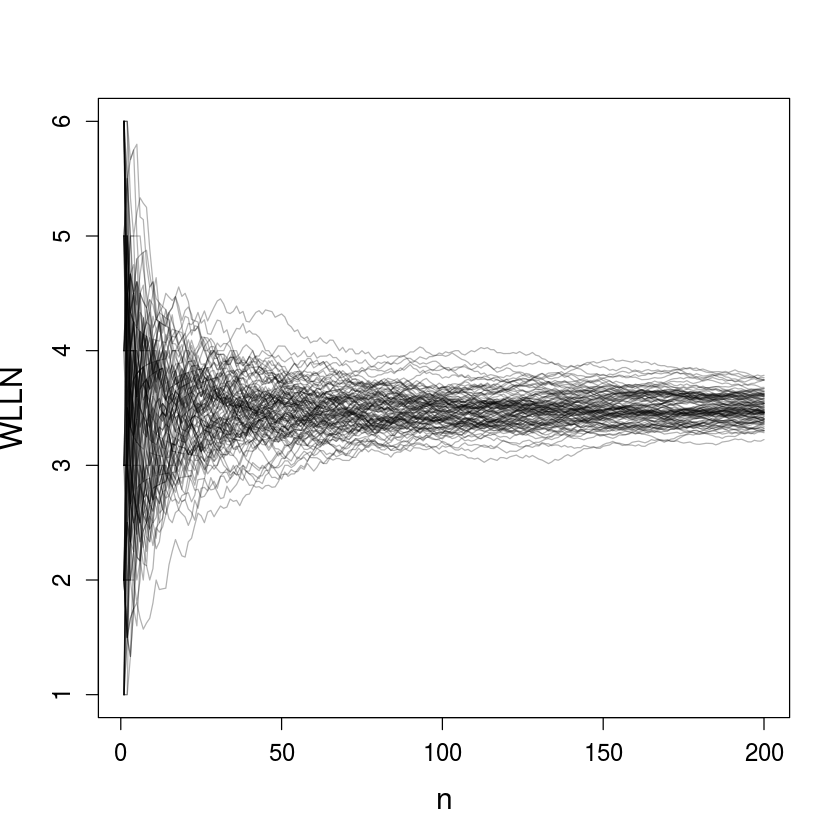

In [83]:
S = seq(from = 1, to = 6, length = 200)
par(cex.main = 1.5, cex.axis = 1.2, cex.lab = 1.5)
plot(1:200, S, type = "n", xlab = "n", ylab = "WLLN")
for (s in 1:100) lines(1:200, cumsum(sample(1:6, 200,
    replace = TRUE))/1:200, col = rgb(0, 0, 0, alpha = 0.3))

El código siguiente muestra los histogramas de promedios de $n = 1,3,30,90 $ muestras independientes e idénticamente distribuidas de una distribución `Exponencial`($\lambda$) (con $\mu = 1$). Debes notar que a medida que $n$ aumenta, los promedios tienden a concentrarse cada vez más alrededor del promedio 1, lo que refleja la ley débil de los grandes números. El teorema del límite central es evidente en que el histograma para valores  $n$ grandes  se asemeja a una curva normal centrada en la media.

Warning message:
“Removed 38 rows containing non-finite values (stat_bin).”

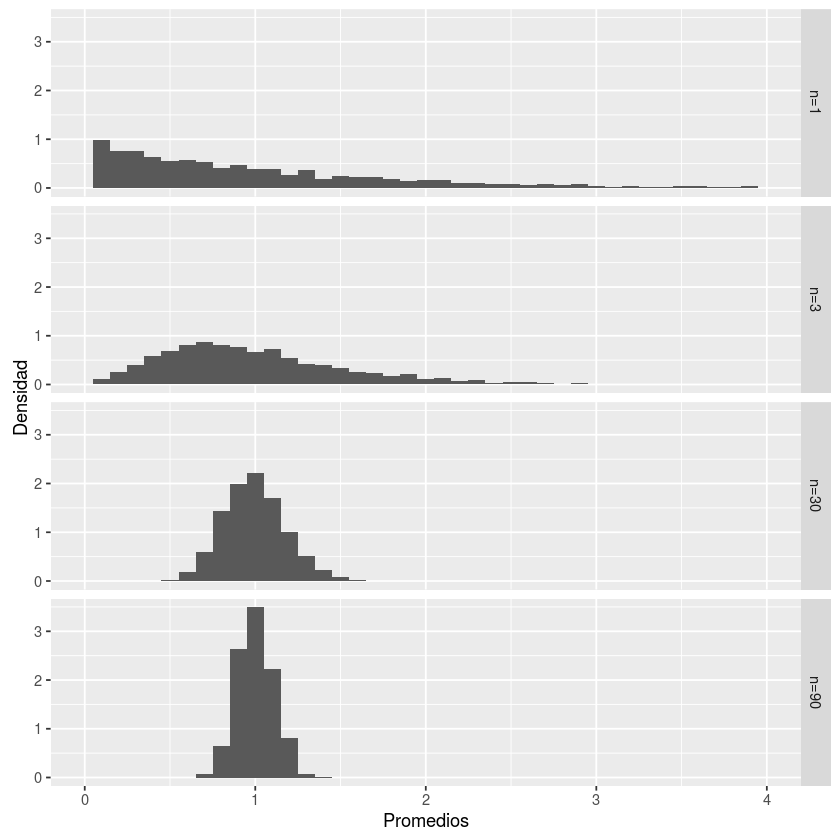

In [105]:
library("ggplot2")
iter = 2000
avg0 <- avg1 <- avg2 <- avg3 <- rep(0, iter)
for (i in 1:iter) {
    S = rexp(90)  # muestra desde la distribucion  exponencial(1) 
    avg0[i] = S[1]
    avg1[i] = mean(S[1:3])
    avg2[i] = mean(S[1:30])
    avg3[i] = mean(S[1:90])
}
SR = stack(list(`n=1` = avg0, `n=3` = avg1, `n=30` = avg2,
    `n=90` = avg3))
names(SR) = c("averages", "n")
p <- ggplot(SR, aes(x = averages, y = ..density..)) + 
facet_grid(n ~.) + geom_histogram(binwidth = 0.1) + scale_x_continuous(limits = c(0,4))
p + labs(x = "Promedios", y = "Densidad")